# Using Decision Tree To Classify Iris Flower

In [1]:
# Import the libraries
import pandas as pd

# Using decision tree to classify the flowers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load data
data = pd.read_csv('iris.csv')
data.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


### There are three kinds of iris flowers - Setosa, Versicolor, and Virginica. They are labeled base on their sepal length, sepal width, petal length, and petal width. This set of data has 150 samples, equally divided for each type.

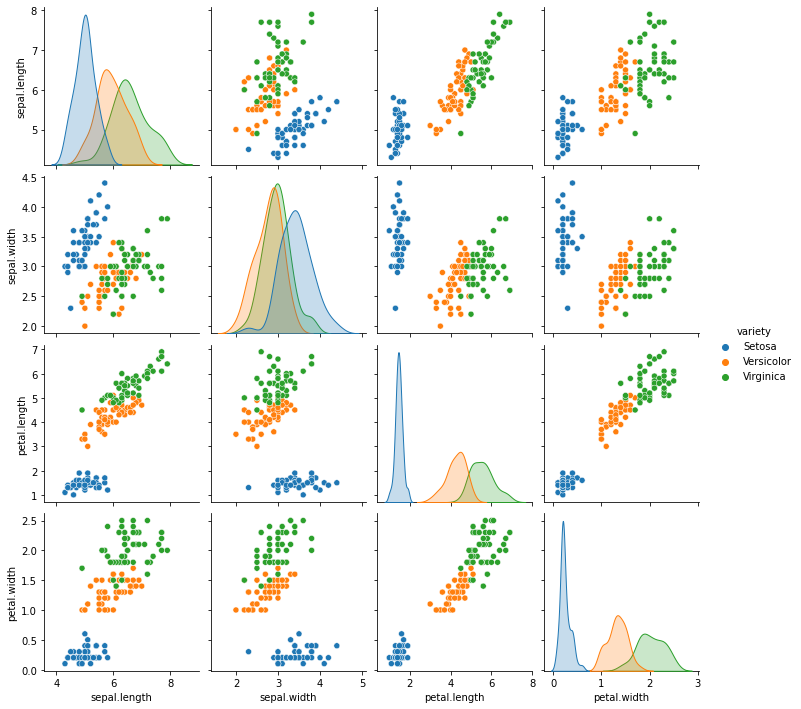

In [2]:
# We first visualize the data to get some sense about it.
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, hue='variety')
plt.show()

### It is easy to see that we can use petal width to categorize the three flower.

In [3]:
# Get features from the data (columns 1 - 4)
features = data.iloc[:, :4]
# Get targets from the data (The last column)
targets = data['variety']

In [4]:
# Now we devide the data into two parts - training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets)

In [5]:
# Using decision tree as a classifier
classifier = DecisionTreeClassifier(random_state=0)

In [6]:
# Now we train the model using training set
model = classifier.fit(X_train, y_train)
# Print the scores to see how well the model perform on the training set
print('Training accuracy: {0:.2f}'.format(model.score(X_train, y_train)))

Training accuracy: 1.00


### The model performs quite well on the training set - approximately 100% accurate. Now we look at how well it does on the test set.

In [7]:
print('Test accuracy: {0:.2f}'.format(model.score(X_test, y_test)))

Test accuracy: 0.97


### The model carries out 97% accuray on the test set. It is not a bad model.

### Now we visualize the tree to help us understand better how the model work.

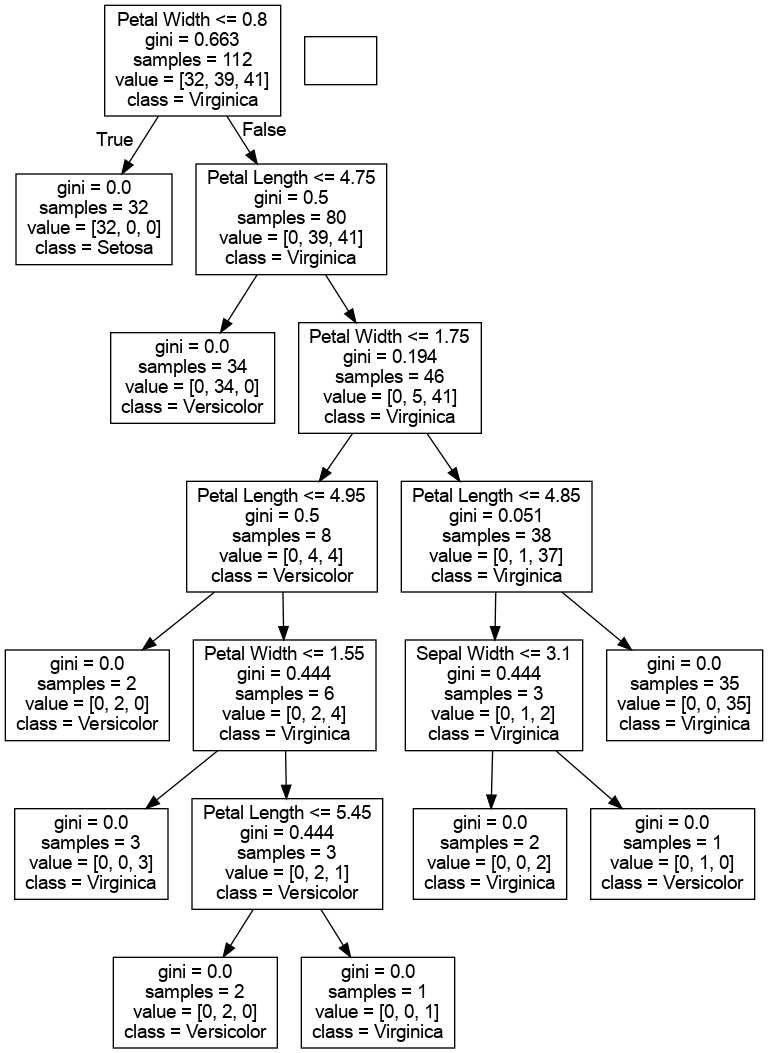

In [8]:
import pydotplus
from IPython.display import Image

# Create dot data
dot_data = tree.export_graphviz(classifier,
                                out_file=None,
                                feature_names=['Sepal length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                                class_names=['Setosa', 'Versicolor', 'Virginica'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

### By visualizing the decision tree, we can easily make sense how the model work.